#**스마트폰 센서 데이터 기반 모션 분류**
# 단계3 : 단계별 모델링


## 0.미션

단계별로 나눠서 모델링을 수행하고자 합니다.  

* 단계1 : 정적(0), 동적(1) 행동 분류 모델 생성
* 단계2 : 세부 동작에 대한 분류모델 생성
    * 단계1 모델에서 0으로 예측 -> 정적 행동 3가지 분류 모델링
    * 단계1 모델에서 1으로 예측 -> 동적 행동 3가지 분류 모델링
* 모델 통합
    * 두 단계 모델을 통합하고, 새로운 데이터에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
* 성능 비교
    * 기본 모델링의 성능과 비교
    * 모든 모델링은 [다양한 알고리즘 + 성능 튜닝]을 수행해야 합니다.


## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [679]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential,Model
from keras.layers import Input, Dense, concatenate
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, SimpleRNN, LSTM, Flatten
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용

 <br/>  

* 세부 요구사항
    - data01_train.csv 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - data01_test.csv 를 불러와 'new_data' 이름으로 저장합니다.


In [680]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/mif3-1/data01_train.csv")
data22=pd.read_csv("/content/drive/MyDrive/mif3-1/data01_test.csv")
df_importance=pd.read_csv("/content/drive/MyDrive/mif3-1/features_importance.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [727]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity_dynamic
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING,0
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING,0
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING,0
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING,1
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,21,SITTING,0
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,15,WALKING_UPSTAIRS,1
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,19,LAYING,0
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,6,WALKING_UPSTAIRS,1


In [681]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

## 2.데이터 전처리

* 세부 요구사항
    - Label 추가 : data 에 Activity_dynamic 를 추가합니다. Activity_dynamic은 과제1에서 is_dynamic과 동일한 값입니다.
    - x와 y1, y2로 분할하시오.
        * y1 : Activity
        * y2 : Activity_dynamic
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [682]:
#Activity_dynamic 컬럼생성
data['Activity_dynamic']=np.where((data['Activity']=='STANDING')|(data['Activity']=='SITTING')|(data['Activity']=='LAYING'),0,1)

In [683]:
data22['Activity_dynamic']=np.where((data22['Activity']=='STANDING')|(data22['Activity']=='SITTING')|(data22['Activity']=='LAYING'),0,1)

In [684]:
#train data
target1='Activity'
target2='Activity_dynamic'
x=data.drop([target1,target2],axis=1)
y1=data.loc[:,target1]
y2=data.loc[:,target2]

In [685]:
#val data
x_test=data22.drop([target1,target2],axis=1)
y1_test=data22.loc[:,target1]
y2_test=data22.loc[:,target2]

## **3.단계별 모델링**

![](https://github.com/DA4BAM/image/blob/main/step%20by%20step.png?raw=true)

### (1) 단계1 : 정적/동적 행동 분류 모델

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)과 동적 행동(동적 : Walking, Walking-Up, Walking-Down)을 구분하는 모델 생성.
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

#### 1) 알고리즘1 : 딥러닝 이진분류, Dense, Layor=3, node=15

In [686]:
new_data=data22
# 동적 데이터셋 생성
dynamic_data = data.loc[data['Activity_dynamic']==1]
dynamic_new_data = new_data.loc[new_data['Activity_dynamic']==1]

dynamic_data['Activity_num'] = dynamic_data['Activity'].map({'WALKING': 0, 'WALKING_DOWNSTAIRS' : 1, 'WALKING_UPSTAIRS' : 2})
dynamic_new_data['Activity_num'] = dynamic_new_data['Activity'].map({'WALKING': 0, 'WALKING_DOWNSTAIRS' : 1, 'WALKING_UPSTAIRS' : 2})

# x,y 설정 및 map
dynamic_data = data.loc[data['Activity_dynamic']==1]
dynamic_new_data = new_data.loc[new_data['Activity_dynamic']==1]

dynamic_data['Activity_num'] = dynamic_data['Activity'].map({'WALKING': 0, 'WALKING_DOWNSTAIRS' : 1, 'WALKING_UPSTAIRS' : 2})
dynamic_new_data['Activity_num'] = dynamic_new_data['Activity'].map({'WALKING': 0, 'WALKING_DOWNSTAIRS' : 1, 'WALKING_UPSTAIRS' : 2})

# train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y2,test_size=0.1)

# 모델 선언
# clear_session()

input = Input(shape=(562,))
hl1  = Dense(15,activation='relu')(input)
hl2  = Dense(9,activation='relu')(hl1)
ol = Dense(3,activation='sigmoid')(hl2)

model_3 = Model(inputs=input, outputs=ol)

model_3.summary()

# 컴파일
model_3.compile(optimizer=Adam(0.0005), loss='sparse_categorical_crossentropy')
# EarlyStopping 설정
min_de = 0.0001; pat = 5
es = EarlyStopping(monitor = 'val_loss', min_delta = min_de, patience = pat)
# 학습
history = model_3.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[es]).history

# 평가 1
pred = model_3.predict(x_val)
pred = pred.argmax(axis=1)

print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

# 평가 2
pred = model_3.predict(x_test)
pred = pred.argmax(axis=1)

print(confusion_matrix(y2_test, pred))
print(classification_report(y2_test, pred))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 562)]             0         
                                                                 
 dense_5 (Dense)             (None, 15)                8445      
                                                                 
 dense_6 (Dense)             (None, 9)                 144       
                                                                 
 dense_7 (Dense)             (None, 3)                 30        
                                                                 
Total params: 8619 (33.67 KB)
Trainable params: 8619 (33.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<ipython-input-686-34c9dbf19c8f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_data['Activity_num'] = dynamic_data['Activity'].map({'WALKING': 0, 'WALKING_DOWNSTAIRS' : 1, 'WALKING_UPSTAIRS' : 2})
<ipython-input-686-34c9dbf19c8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamic_new_data['Activity_num'] = dynamic_new_data['Activity'].map({'WALKING': 0, 'WALKING_DOWNSTAIRS' : 1, 'WALKING_UPSTAIRS' : 2})
<ipython-input-686-34c9dbf19c8f>:13: SettingWithCopyWarning: 
A value is trying to be se

Epoch 1/100
133/133 [==============================] - 1s 6ms/step - loss: 0.4012 - val_loss: 0.0865
Epoch 2/100
133/133 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.0173
Epoch 3/100
133/133 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0076
Epoch 4/100
133/133 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 5/100
133/133 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0033
Epoch 6/100
133/133 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 7/100
133/133 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/100
133/133 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/100
133/133 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/100
133/133 [==============================] - 0s 2ms/step - loss: 0.0010 - val_lo

#### 2) 알고리즘2 :  딥러닝 이진분류, Dense, Layor=5, node=562

In [687]:
#정적, 동적 분류 알고리즘
# 생성

n = x_train.shape[1]

clear_session()

model1 = Sequential([
    Dense(562, input_shape=(n,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.summary()


# 학습

model1.compile(optimizer=Adam(0.01), loss='binary_crossentropy')

es = EarlyStopping(monitor='val_loss', patience=5, min_delta= 0.0001)

hist = model1.fit(x_train,y_train, epochs=100, validation_split=.2, callbacks=[es]).history


# 평가지표

pred = model1.predict(x_test)
pred = np.where(pred >= 0.5, 1, 0)
print(classification_report(y2_test, pred))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 562)               316406    
                                                                 
 dense_1 (Dense)             (None, 256)               144128    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 478039 (1.82 MB)
Trainable params: 478039 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
133/133 

### (2) 단계2-1 : 정적 동작 세부 분류

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)인 데이터 추출
    * Laying, Sitting, Standing 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

### 1) 데이터전처리

In [688]:
#Activity 칼럼에서 정적 동작만 잘라냄
data_2=data.loc[(data['Activity']=='STANDING')|(data['Activity']=='SITTING')|(data['Activity']=='LAYING')]
data22_2=data22.loc[(data22['Activity']=='STANDING')|(data22['Activity']=='SITTING')|(data22['Activity']=='LAYING')]

In [689]:
#딥러닝을 위해 0,1,2로 mapping
data_2['Activity'] = data_2['Activity'].map({'STANDING':0, 'SITTING':1,'LAYING':2})
data22_2['Activity'] = data22_2['Activity'].map({'STANDING':0, 'SITTING':1,'LAYING':2})

<ipython-input-689-19d3334301b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Activity'] = data_2['Activity'].map({'STANDING':0, 'SITTING':1,'LAYING':2})
<ipython-input-689-19d3334301b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22_2['Activity'] = data22_2['Activity'].map({'STANDING':0, 'SITTING':1,'LAYING':2})


In [690]:
#x,y분리 (x_t는 val데이터)
target='Activity'
x=data_2.drop(target,axis=1)
y=data_2.loc[:,target]
x_t=data22_2.drop(target,axis=1)
y_t=data22_2.loc[:,target]

In [691]:
#필요없는 열 삭제
x.drop('subject',axis=1,inplace=True)
x_t.drop('subject',axis=1,inplace=True)

In [692]:
#train, test나누기
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [693]:
#min,max 스케일링
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_t=scaler.transform(x_t)

#### 1) 알고리즘1 : SVC

In [694]:
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')

In [695]:
# 정적 best param
# param =  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
model_s2 = SVC(C= 100, gamma= 0.1, kernel= 'rbf')
model_s2.fit(x_train, y_train)
pred_s1 = model_s2.predict(x_test)

print('='*60)
print('accuracy :',accuracy_score(y_test ,pred_s1))
print('='*60)
print(confusion_matrix(y_test, pred_s1))
print('='*60)
print(classification_report(y_test, pred_s1))

accuracy : 0.9742533470648815
[[321  10   3]
 [ 11 305   1]
 [  0   0 320]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       334
           1       0.97      0.96      0.97       317
           2       0.99      1.00      0.99       320

    accuracy                           0.97       971
   macro avg       0.97      0.97      0.97       971
weighted avg       0.97      0.97      0.97       971



#### 2) 알고리즘2 : Random Forest

In [696]:
model_sr = RandomForestClassifier()

model_sr.fit(x_train, y_train)

pred_sr = model_sr.predict(x_test)

print('accuracy :',accuracy_score(y_test, pred_sr))
print('='*60)
print(confusion_matrix(y_test, pred_sr))
print('='*60)
print(classification_report(y_test, pred_sr))

accuracy : 0.9629248197734295
[[315  19   0]
 [ 17 300   0]
 [  0   0 320]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       334
           1       0.94      0.95      0.94       317
           2       1.00      1.00      1.00       320

    accuracy                           0.96       971
   macro avg       0.96      0.96      0.96       971
weighted avg       0.96      0.96      0.96       971





#### 3) 알고리즘3 : 상위 350개 변수 Dense

In [697]:
##RF로 나온 정적에서 중요한 상위 350개의 feature를 사용
nfeatures=350
data_2=data.loc[(data['Activity']=='LAYING')|(data['Activity']=='SITTING')|(data['Activity']=='STANDING')]
data22_2=data22.loc[(data22['Activity']=='LAYING')|(data22['Activity']=='SITTING')|(data22['Activity']=='STANDING')]
data_2['Activity'] = data_2['Activity'].map({'SITTING':0, 'STANDING':1,'LAYING':2})
data22_2['Activity'] = data22_2['Activity'].map({'SITTING':0, 'STANDING':1,'LAYING':2})
df_importance['importance_sum'] = df_importance[['importance_standing', 'importance_sitting', 'importance_laying']].sum(axis=1)
df_importance=df_importance.sort_values(by='importance_sum', ascending=False)
columns=df_importance[:nfeatures]['feature_name']
x=data_2[columns]
y=data_2.loc[:,target]

<ipython-input-697-719be372ef9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Activity'] = data_2['Activity'].map({'SITTING':0, 'STANDING':1,'LAYING':2})
<ipython-input-697-719be372ef9b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22_2['Activity'] = data22_2['Activity'].map({'SITTING':0, 'STANDING':1,'LAYING':2})


In [698]:
x_t=data22_2[columns]
y_t=data22_2.loc[:,target]

In [699]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [700]:
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_t=scaler.transform(x_t)

In [701]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( [Dense(40 , input_shape = (nfeatures,), activation='relu'),
                     Dense(20 , activation='relu'),
                     Dense(5, activation='relu'),
                     Dense(3, activation='softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                14040     
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
Total params: 14983 (58.53 KB)
Trainable params: 14983 (58.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [702]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 250, validation_split=0.2).history

Epoch 1/250
57/57 [==============================] - 1s 7ms/step - loss: 1.0629 - val_loss: 1.0177
Epoch 2/250
57/57 [==============================] - 0s 4ms/step - loss: 0.9744 - val_loss: 0.8985
Epoch 3/250
57/57 [==============================] - 0s 4ms/step - loss: 0.8642 - val_loss: 0.8001
Epoch 4/250
57/57 [==============================] - 0s 3ms/step - loss: 0.7792 - val_loss: 0.7272
Epoch 5/250
57/57 [==============================] - 0s 3ms/step - loss: 0.7128 - val_loss: 0.6632
Epoch 6/250
57/57 [==============================] - 0s 4ms/step - loss: 0.6577 - val_loss: 0.6138
Epoch 7/250
57/57 [==============================] - 0s 4ms/step - loss: 0.6143 - val_loss: 0.5774
Epoch 8/250
57/57 [==============================] - 0s 4ms/step - loss: 0.5794 - val_loss: 0.5455
Epoch 9/250
57/57 [==============================] - 0s 4ms/step - loss: 0.5519 - val_loss: 0.5202
Epoch 10/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5292 - val_loss: 0.4999
Epoch 11/

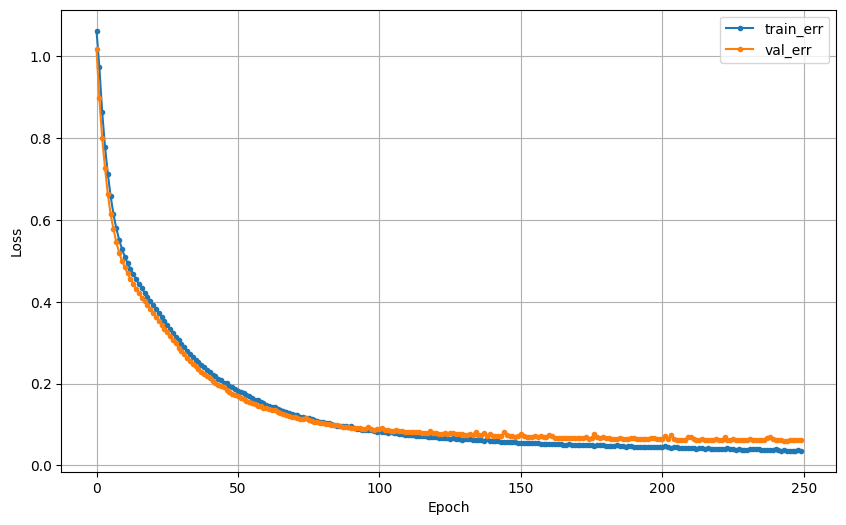

In [703]:
dl_history_plot(history)

In [704]:
pred = model.predict(x_t)

27/27 [==============================] - 0s 1ms/step


In [705]:
pred_1 = pred.argmax(axis=1)

In [706]:
print(confusion_matrix(y_t, pred_1))
print(classification_report(y_t, pred_1))
print(accuracy_score(y_t, pred_1))

[[247   5   2]
 [ 19 268   0]
 [  0   0 292]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       254
           1       0.98      0.93      0.96       287
           2       0.99      1.00      1.00       292

    accuracy                           0.97       833
   macro avg       0.97      0.97      0.97       833
weighted avg       0.97      0.97      0.97       833

0.9687875150060024


In [707]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### (3) 단계2-2 : 동적 동작 세부 분류

* 세부 요구사항
    * 동적 행동(Walking, Walking Upstairs, Walking Downstairs)인 데이터 추출
    * Walking, Walking Upstairs, Walking Downstairs 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

#### 1) 데이터 전처리

In [708]:
#Activity 칼럼에서 동적 동작만 잘라냄
data_2=data.loc[(data['Activity']=='WALKING')|(data['Activity']=='WALKING_UPSTAIRS')|(data['Activity']=='WALKING_DOWNSTAIRS')]
data22_2=data22.loc[(data22['Activity']=='WALKING')|(data22['Activity']=='WALKING_UPSTAIRS')|(data22['Activity']=='WALKING_DOWNSTAIRS')]

In [709]:
#딥러닝을 위해 0,1,2로 mapping
data_2['Activity'] = data_2['Activity'].map({'WALKING':0, 'WALKING_UPSTAIRS':1,'WALKING_DOWNSTAIRS':2})
data22_2['Activity'] = data22_2['Activity'].map({'WALKING':0, 'WALKING_UPSTAIRS':1,'WALKING_DOWNSTAIRS':2})

<ipython-input-709-2c77894fa9c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Activity'] = data_2['Activity'].map({'WALKING':0, 'WALKING_UPSTAIRS':1,'WALKING_DOWNSTAIRS':2})
<ipython-input-709-2c77894fa9c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22_2['Activity'] = data22_2['Activity'].map({'WALKING':0, 'WALKING_UPSTAIRS':1,'WALKING_DOWNSTAIRS':2})


In [710]:
#x,y분리 (x_t는 val데이터)
target='Activity'
x=data_2.drop(target,axis=1)
y=data_2.loc[:,target]
x_t=data22_2.drop(target,axis=1)
y_t=data22_2.loc[:,target]

In [711]:
#필요없는 열 삭제
x.drop('subject',axis=1,inplace=True)
x_t.drop('subject',axis=1,inplace=True)

In [712]:
#train, test나누기
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [713]:
#min,max 스케일링
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_t=scaler.transform(x_t)

#### 1) 알고리즘1 : SVC

In [714]:
# 동적 best param
# param = {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
model_s1 = SVC(C= 1, gamma= 0.0001, kernel= 'linear')
model_s1.fit(x_train, y_train)
pred_s1 = model_s1.predict(x_test)

print('='*60)
print('accuracy :',accuracy_score(y_test ,pred_s1))
print('='*60)
print(confusion_matrix(y_test, pred_s1))
print('='*60)
print(classification_report(y_test, pred_s1))

accuracy : 0.9987421383647799
[[307   0   0]
 [  0 244   1]
 [  0   0 243]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       245
           2       1.00      1.00      1.00       243

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795



#### 2) 알고리즘2 : RandomForest

In [715]:
model_sr = RandomForestClassifier()

model_sr.fit(x_train, y_train)

pred_sr = model_sr.predict(x_test)

print('accuracy :',accuracy_score(y_test, pred_sr))
print('='*60)
print(confusion_matrix(y_test, pred_sr))
print('='*60)
print(classification_report(y_test, pred_sr))

accuracy : 0.9861635220125786
[[305   1   1]
 [  0 241   4]
 [  2   3 238]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       307
           1       0.98      0.98      0.98       245
           2       0.98      0.98      0.98       243

    accuracy                           0.99       795
   macro avg       0.99      0.99      0.99       795
weighted avg       0.99      0.99      0.99       795



#### 3) 알고리즘3 : Dense, layor=2, node=258

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 258)               145254    
                                                                 
 dense_1 (Dense)             (None, 3)                 777       
                                                                 
Total params: 146031 (570.43 KB)
Trainable params: 146031 (570.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
47/47 [==============================] - 1s 8ms/step - loss: 0.5156 - val_loss: 0.2756
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.2116 - val_loss: 0.1520
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.1397 - val_loss: 0.1643
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0923 - val_loss: 0.1061
Epoch 5/50
47/47 [==

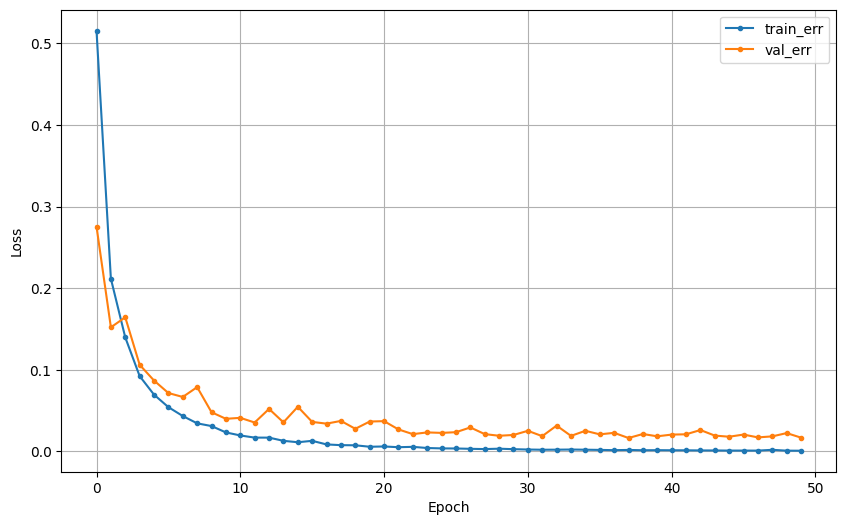

25/25 [==============================] - 0s 2ms/step
0.9962264150943396
[[307   0   0]
 [  1 244   0]
 [  0   2 241]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       0.99      1.00      0.99       245
           2       1.00      0.99      1.00       243

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795



In [716]:
# 동적분류 알고리즘

# 메모리 정리
clear_session()

# Sequential
model_dy = Sequential([Dense(258 , input_shape = (x_train.shape[1],), activation='relu'),
                       Dense(3, activation='softmax')])

# 모델요약
model_dy.summary()

# compile 및 학습
model_dy.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy')
hist_dy = model_dy.fit(x_train, y_train, epochs = 50, validation_split= .2).history

# model_dy = tf.keras.models.load_model('model_dy.h5') # 모델 파일 불러오기
dl_history_plot(hist_dy) # 그래프 그리기

pred_dy = model_dy.predict(x_test)
pred_dy = pred_dy.argmax(axis=1)

print(accuracy_score(y_test, pred_dy))
print(confusion_matrix(y_test, pred_dy))
print(classification_report(y_test, pred_dy))

### [선택사항] (4) 분류 모델 합치기


* 세부 요구사항
    * 두 단계 모델을 통합하고, 새로운 데이터(test)에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
    * 데이터 파이프라인 구축 : test데이터가 로딩되어 전처리 과정을 거치고, 예측 및 성능 평가 수행

![](https://github.com/DA4BAM/image/blob/main/pipeline%20function.png?raw=true)

#### 1) 함수 만들어서 분류 모델 합치기

In [734]:
# 분류모델 합치기 함수
#test 데이터 불러오기 & x,y 나누기
test_data = pd.read_csv('/content/drive/MyDrive/mif3-1/data01_test.csv')
x = test_data.drop('Activity',axis=1)
y = test_data.loc[:,'Activity']

from tqdm import tqdm

# 제출용
# model_1 : 정적/동적 분류모델
# model_2 : 정적 동작 분류모델
# model_3 : 동적 동작 분류모델

def activity_analyze(x,y,model_1,model_2,model_3,return_pred=True):
    pred_1 = model_1.predict(x,verbose=0)
    pred_1 = np.where(pred_1 >= 0.5,1,0)

    pred = []
    for i in tqdm(range(x.shape[0])):

      if pred_1[i] == 0:
        pred_2 = model_2.predict(x.iloc[[i]])
        print(pred_2[0])
        #값 변환
        pred_2 = np.where(pred_2 ==0,'STANDING',np.where(pred_2 == 1,'SITTING','LAYING'))
        pred_2 = pred_2.argmax(axis=1)
        pred.append(pred_2[0])
        print(pred_2[0])
      else:
        pred_3 = model_3.predict(x.iloc[[i]],verbose=0)
        pred_3 = pred_3.argmax(axis=1)
        #값 변환
        pred_3 = np.where(pred_3 ==0,'WALKING',np.where(pred_3 == 1,'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'))
        pred.append(pred_3[0])

    print(); print('-'*65); print()
    print('Confusion_Matrix'); print(confusion_matrix(y, np.array(pred))); print()
    print('Classification_Report'); print(classification_report(y, np.array(pred)))

    if return_pred:
      return np.array(pred)


In [735]:
activity_analyze(x,y,model1,model_s2,model_dy)

  0%|          | 0/1471 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
  0%|          | 0/1471 [00:00<?, ?it/s]

2


AxisError: axis 1 is out of bounds for array of dimension 1